In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()


In [6]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(
    scaler.fit_transform(df_market_data),
    columns=df_market_data.columns,
    index=df_market_data.index
)

# Copy the crypto names from the original data
# Set the coinid column as index
# Display sample data
print("Scaled Data:")
print(df_market_data_scaled.head())

Scaled Data:
              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                   

---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 11))

In [8]:

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in range(1, 12):
    kmeans_model = KMeans(n_clusters=k, random_state=9)
    kmeans_model.fit(df_market_data_scaled)
    inertia_values.append(kmeans_model.inertia_)

print(inertia_values)   

[287.0, 198.57181809798126, 145.63574772192865, 79.02243535120977, 66.21778006000338, 53.05778846567061, 45.056883530230586, 37.30499134592288, 33.892023055675814, 29.45363750779474, 24.770079302204834]


C:\Users\liana\anaconda3\envs\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\liana\anaconda3\envs\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\liana\anaconda3\envs\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\liana\anaconda3\envs\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k_values": list(range(1, 12)), "inertia_values": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

<Axes: title={'center': 'Elbow Method for Optimal k'}, xlabel='Number of Clusters (k)', ylabel='Inertia'>

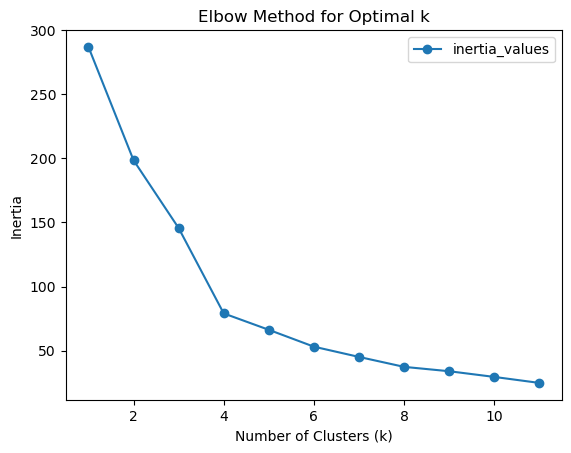

In [10]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_curve = df_elbow.plot(x='k_values', y='inertia_values', marker='o', xlabel='Number of Clusters (k)', ylabel='Inertia', title='Elbow Method for Optimal k', kind='line')
elbow_curve



#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** It's probably 4 and 5

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [11]:
# Initialize the K-Means model using the best value for k
best_k = 4 
kmeans_model = KMeans(n_clusters=best_k, random_state=9)

In [12]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_market_data_scaled)

C:\Users\liana\anaconda3\envs\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=9)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_predictions = kmeans_model.predict(df_market_data_scaled)


# Print the resulting array of cluster values.
print(cluster_predictions)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 1 0 2 2 3
 2 2 2 2]


In [14]:
# Create a copy of the DataFrame
df_clustered = df_market_data_scaled.copy()

In [15]:
# Add a new column to the DataFrame with the predicted clusters
df_clustered['cluster'] = cluster_predictions

# Display sample data
print(df_clustered.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [16]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_clustered.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="cluster",  
    cmap="viridis",  
    hover_cols=["crypto_name"], 
    title="Cryptocurrency Clusters",
    xlabel="Price Change Percentage (24h)",
    ylabel="Price Change Percentage (7d)",
    frame_width=700, 
    frame_height=500 
)

scatter_plot


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster)

---

### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [18]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
df_pca = pca.fit_transform(df_market_data_scaled)
df_pca = pd.DataFrame(df_pca, columns=["PCA1", "PCA2", "PCA3"], index=df_market_data_scaled.index)
# View the first five rows of the DataFrame. 
df_pca.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [19]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print("Variance for Each Principal Component:")
for i, variance in enumerate(explained_variance):
    print(f"PCA{i + 1}: {variance:.4f}")


Variance for Each Principal Component:
PCA1: 0.3720
PCA2: 0.3470
PCA3: 0.1760


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Total Explained Variance=0.3720+0.3470+0.1760 = 0.895

In [20]:
# Create a new DataFrame with the PCA data
df_pca = pd.DataFrame(df_pca, columns=["PCA1", "PCA2", "PCA3"], index=df_market_data_scaled.index)

# Copy the crypto names from the original data
df_pca['crypto_name'] = df_market_data_scaled.index

# Set the coin_id column as the index
df_pca.set_index('crypto_name', inplace=True)

# Display sample data
df_pca.head()



,PCA1,PCA2,PCA3
crypto_name,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [21]:
# Create a list with the number of k-values from 1 to 11
k_values_pca = list(range(1, 11))

In [22]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values_pca:
    kmeans_model_pca = KMeans(n_clusters=k, random_state=9)
    kmeans_model_pca.fit(df_pca)
    inertia_values_pca.append(kmeans_model_pca.inertia_)

C:\Users\liana\anaconda3\envs\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\liana\anaconda3\envs\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\liana\anaconda3\envs\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\liana\anaconda3\envs\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

In [23]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k_values": k_values_pca, "inertia_values": inertia_values_pca}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

<Axes: title={'center': 'Elbow Method for Optimal k (PCA Data)'}, xlabel='Number of Clusters (k)', ylabel='Inertia'>

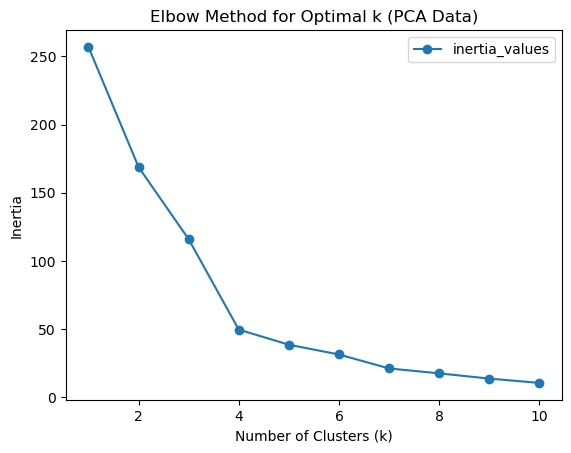

In [24]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_curve_pca = df_elbow_pca.plot(x='k_values', y='inertia_values', marker='o', xlabel='Number of Clusters (k)', ylabel='Inertia', title='Elbow Method for Optimal k (PCA Data)', kind='line')

elbow_curve_pca


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [25]:
# Initialize the K-Means model using the best value for k
optimal_k_pca = 4
kmeans_model_optimal_pca = KMeans(n_clusters=optimal_k_pca, random_state=9)

In [26]:
# Fit the K-Means model using the PCA data
kmeans_model_optimal_pca.fit(df_pca)

C:\Users\liana\anaconda3\envs\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=9)

In [27]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters_pca = kmeans_model_optimal_pca.predict(df_pca)
# Print the resulting array of cluster values.
print(clusters_pca)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 1 0 2 2 3
 2 2 2 2]


In [28]:
# Create a copy of the DataFrame with the PCA data
df_pca_clusters = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_clusters['cluster'] = clusters_pca

# Display sample data
df_pca_clusters.head()

,PCA1,PCA2,PCA3,cluster
crypto_name,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [29]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot_pca = df_pca_clusters.hvplot.scatter(
    x='PCA1',
    y='PCA2',
    by='cluster',
    hover_cols=['crypto_name'],
    title='Clustered Cryptocurrencies (PCA Data)',
    xlabel='Principal Component 1 (PCA1)',
    ylabel='Principal Component 2 (PCA2)',
    cmap='Category10',  # You can choose a different colormap if needed
)

scatter_plot_pca

:NdOverlay   [cluster]
   :Scatter   [PCA1]   (PCA2,crypto_name)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

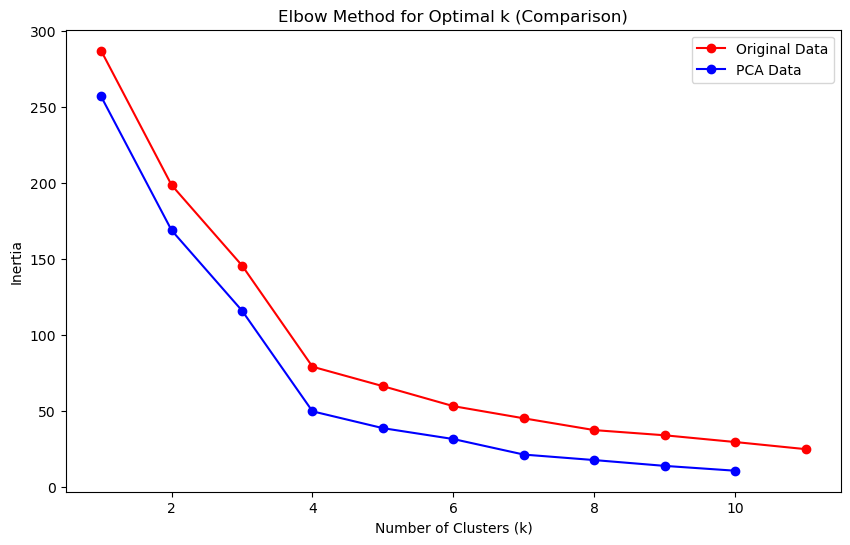

In [30]:
# Composite plot to contrast the Elbow curves
# Import necessary libraries
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt  # Add this line

# ... (your existing code)

# Composite plot to contrast the Elbow curves using Matplotlib
plt.figure(figsize=(10, 6))

# Plot the original elbow curve
plt.plot(df_elbow['k_values'], df_elbow['inertia_values'], marker='o', color='red', label='Original Data')

# Plot the PCA elbow curve
plt.plot(df_elbow_pca['k_values'], df_elbow_pca['inertia_values'], marker='o', color='blue', label='PCA Data')

# Set plot labels and title
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (Comparison)')
plt.legend()
plt.show()



In [31]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
# Scatter plot for the original data
scatter_plot = df_clustered.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="cluster",  
    cmap="viridis",  
    hover_cols=["crypto_name"], 
    title="Cryptocurrency Clusters",
    xlabel="Price Change Percentage (24h)",
    ylabel="Price Change Percentage (7d)",
    frame_width=700, 
    frame_height=500 
)

# Scatter plot for the PCA data
scatter_pca = df_pca_clusters.hvplot.scatter(
    x='PCA1', y='PCA2',
    by='cluster',  
    hover_cols=['crypto_name'],
    title='Clusters (PCA Data)',
    cmap='Category10'
)


# Composite plot to contrast the clusters
composite_plot_clusters = scatter_plot + scatter_pca

composite_plot_clusters



:Layout
   .Scatter.I   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster)
   .NdOverlay.I :NdOverlay   [cluster]
      :Scatter   [PCA1]   (PCA2,crypto_name)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 